In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [87]:
#Read in CSV File Dataset 
All_DataScience_Salaries_df = pd.read_csv('Resources/Data Science Salary Dataset.csv')

All_DataScience_Salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [88]:
#Total Columns and number of entries 
All_DataScience_Salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [89]:
#Finding Values 
All_DataScience_Salaries_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [90]:
#Finding values with objects 
All_DataScience_Salaries_df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [119]:
All_DataScience_Salaries_df["salary_in_usd"].min()

2859

In [91]:
#Find missing values 
All_DataScience_Salaries_df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values in this dataset.


In [92]:
#Checking for duplicate values  
All_DataScience_Salaries_df.duplicated().sum()

0

In [125]:
All_DataScience_Salaries_df["remote_ratio"].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

No duplicates in this dataset.

In [93]:
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('EN','Junior')
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('MI','Middle')
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('SE','Senior')
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('EX','Executive')

TypeError: 'str' object is not callable

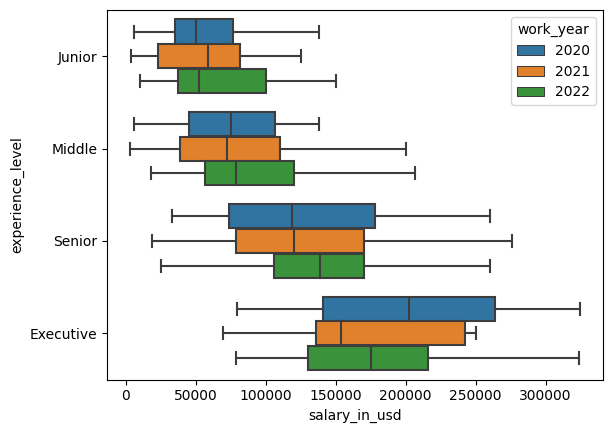

In [94]:
#Showing a visual of all careers, years and there U.S. Salary 
order = ['Junior', 'Middle', 'Senior','Executive']
sns.boxplot(x=All_DataScience_Salaries_df['salary_in_usd'],
             y=All_DataScience_Salaries_df['experience_level'], 
             order=order,
             hue=All_DataScience_Salaries_df['work_year'],
             showfliers = False)   
plt.title('The relationship between salary and experience_level');

Overview of all experience levels with salary in the U.S. in 2020,2021,2022

Filtering to find Data Analyst, Business Analyst, Bi Analyst Title. 

In [95]:
job_counts=All_DataScience_Salaries_df['job_title'].value_counts()

job_counts

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [98]:
def segment(job_title):
    data_scientist=["Data Scientist","Principal Data Scientist","Staff Data Scientist","Lead Data Scientist","Data Specialist","Head of Data Science","Applied Data Scientist","Head of Data","Director of Data Science","Data Science Consultant","Principal Data Scientist","Data Science Manager"]
    machine_learn=["ML Engineer","Machine Learning Manager","Head of Machine Learning ","NLP Engineer","Lead Machine Learning Engineer","Machine Learning Infrastructure Engineer","Machine Learning Developer","Applied Machine Learning Scientist","Machine Learning Scientist","Machine Learning Engineer"]
    data_analyst=["Data Analyst","BI Data Analyst","Finance Data Analyst","Marketing Data Analyst","Product Data Analyst","Principal Data Analyst","Lead Data Analyst","Business Data Analyst"]
    data_engineer=["Data Engineer","Lead Data Engineer","Data Engineering Manager","Big Data Architect","Cloud Data Engineer","Director of Data Engineering","Principal Data Engineer ","Data Science Engineer","Analytics Engineer","Big Data Engineer","Data Architect"]
    bi_analytics=["Data Analytics Lead","Data Analytics Engineer","Data Analytics Manager"]
    
    others=["3D Computer Vision Researcher","ETL Developer","Computer Vision Software Engineer","Computer Vision Engineer","AI Scientist","Research Scientist"]
    
    if job_title  in data_scientist:
        return "data Scientist"
    elif job_title in machine_learn:
        return "Machine Learn"
    elif job_title in data_analyst:
        return "data analyst"
    elif job_title in data_engineer:
        return "data engineer"
    elif job_title in bi_analytics:
        return "BI analytics"
    elif job_title in others:
        return "other jobs"
    else: return "uncategorized"

In [99]:
All_DataScience_Salaries_df["job_title"]=All_DataScience_Salaries_df["job_title"].apply(segment)

<Axes: >

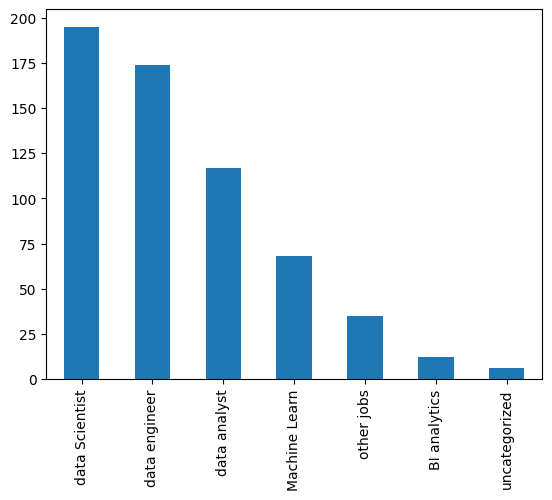

In [37]:
All_DataScience_Salaries_df["job_title"].value_counts().plot(kind="bar")

<Axes: ylabel='job_title'>

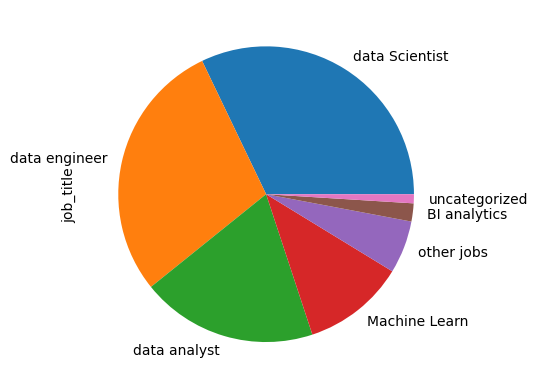

In [100]:
All_DataScience_Salaries_df["job_title"].value_counts().plot(kind="pie")


<Axes: ylabel='remote_ratio'>

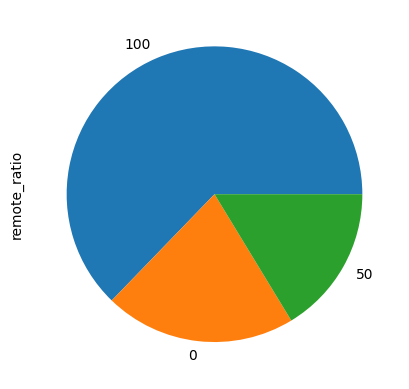

In [126]:
All_DataScience_Salaries_df["remote_ratio"].value_counts().plot(kind="pie")

Filter to Data Analyst, Marketing Data Analyst, Data Analytics Lead, Business Data Analyst, BI Data Analyst, Data Analytics Manager, Data Analytics Lead, Head of Data.

In [101]:
DataScience_New_DF= All_DataScience_Salaries_df.drop("employee_residence", axis='columns')

DataScience_New_DF

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,Middle,FT,data Scientist,70000,EUR,79833,0,DE,L
1,1,2020,Senior,FT,Machine Learn,260000,USD,260000,0,JP,S
2,2,2020,Senior,FT,data engineer,85000,GBP,109024,50,GB,M
3,3,2020,Middle,FT,data analyst,20000,USD,20000,0,HN,S
4,4,2020,Senior,FT,Machine Learn,150000,USD,150000,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,data engineer,154000,USD,154000,100,US,M
603,603,2022,Senior,FT,data engineer,126000,USD,126000,100,US,M
604,604,2022,Senior,FT,data analyst,129000,USD,129000,0,US,M
605,605,2022,Senior,FT,data analyst,150000,USD,150000,100,US,M


In [102]:

DataScience_clean_DF= DataScience_New_DF.drop("salary_currency", axis='columns')

DataScience_clean_DF




,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,Middle,FT,data Scientist,70000,79833,0,DE,L
1,1,2020,Senior,FT,Machine Learn,260000,260000,0,JP,S
2,2,2020,Senior,FT,data engineer,85000,109024,50,GB,M
3,3,2020,Middle,FT,data analyst,20000,20000,0,HN,S
4,4,2020,Senior,FT,Machine Learn,150000,150000,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,data engineer,154000,154000,100,US,M
603,603,2022,Senior,FT,data engineer,126000,126000,100,US,M
604,604,2022,Senior,FT,data analyst,129000,129000,0,US,M
605,605,2022,Senior,FT,data analyst,150000,150000,100,US,M


In [105]:
DataScience_clean_DF2=DataScience_clean_DF.drop("salary", axis='columns')
DataScience_clean_DF2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,Middle,FT,data Scientist,79833,0,DE,L
1,1,2020,Senior,FT,Machine Learn,260000,0,JP,S
2,2,2020,Senior,FT,data engineer,109024,50,GB,M
3,3,2020,Middle,FT,data analyst,20000,0,HN,S
4,4,2020,Senior,FT,Machine Learn,150000,50,US,L
...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,data engineer,154000,100,US,M
603,603,2022,Senior,FT,data engineer,126000,100,US,M
604,604,2022,Senior,FT,data analyst,129000,0,US,M
605,605,2022,Senior,FT,data analyst,150000,100,US,M


In [108]:
filter_list = ["data analyst"]
Filter_jobTitle =DataScience_clean_DF2[DataScience_clean_DF2.job_title.isin(filter_list)]
 
Filter_jobTitle

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
3,3,2020,Middle,FT,data analyst,20000,0,HN,S
5,5,2020,Junior,FT,data analyst,72000,100,US,L
8,8,2020,Middle,FT,data analyst,135000,100,US,L
13,13,2020,Middle,FT,data analyst,87000,100,US,L
14,14,2020,Middle,FT,data analyst,85000,100,US,L
...,...,...,...,...,...,...,...,...,...
597,597,2022,Senior,FT,data analyst,170000,100,US,M
600,600,2022,Junior,FT,data analyst,67000,0,CA,M
601,601,2022,Junior,FT,data analyst,52000,0,CA,M
604,604,2022,Senior,FT,data analyst,129000,0,US,M


In [109]:
filter_list = ['Junior', "Middle"]
Filter_Experience=Filter_jobTitle[Filter_jobTitle.experience_level.isin(filter_list)]

Filter_Experience

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
3,3,2020,Middle,FT,data analyst,20000,0,HN,S
5,5,2020,Junior,FT,data analyst,72000,100,US,L
8,8,2020,Middle,FT,data analyst,135000,100,US,L
13,13,2020,Middle,FT,data analyst,87000,100,US,L
14,14,2020,Middle,FT,data analyst,85000,100,US,L
15,15,2020,Middle,FT,data analyst,8000,50,PK,L
21,21,2020,Middle,FT,data analyst,6072,100,IN,L
23,23,2020,Middle,FT,data analyst,98000,0,US,M
28,28,2020,Junior,CT,data analyst,100000,100,US,L
34,34,2020,Middle,FT,data analyst,46759,50,FR,L


In [111]:
filter_list = ['S', 'M']
Filter_CompanySize=Filter_Experience[Filter_Experience.company_size.isin(filter_list)]

Filter_CompanySize.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
3,3,2020,Middle,FT,data analyst,20000,0,HN,S
23,23,2020,Middle,FT,data analyst,98000,0,US,M
38,38,2020,Junior,FT,data analyst,10000,100,NG,S
50,50,2020,Junior,FT,data analyst,6072,0,IN,S
76,76,2021,Middle,FT,data analyst,100000,100,US,M


In [142]:
filter_list = ['US']
Filter_CompanyLocation=Filter_CompanySize[Filter_CompanySize.company_location.isin(filter_list)]

Filter_CompanyLocation



,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
23,23,2020,Middle,FT,data analyst,98000,0,US,M
76,76,2021,Middle,FT,data analyst,100000,100,US,M
79,79,2021,Junior,FT,data analyst,80000,100,US,M
118,118,2021,Junior,FT,data analyst,90000,100,US,S
122,122,2021,Junior,FT,data analyst,50000,100,US,M
135,135,2021,Middle,FT,data analyst,90000,100,US,M
168,168,2021,Junior,FT,data analyst,55000,50,US,S
172,172,2021,Junior,FT,data analyst,60000,100,US,S
307,307,2022,Middle,FT,data analyst,106260,0,US,M
308,308,2022,Middle,FT,data analyst,126500,0,US,M


In [113]:
len(Filter_CompanyLocation)

16

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
23,23,2020,Middle,FT,data analyst,98000,0,US,M
76,76,2021,Middle,FT,data analyst,100000,100,US,M
79,79,2021,Junior,FT,data analyst,80000,100,US,M
118,118,2021,Junior,FT,data analyst,90000,100,US,S
122,122,2021,Junior,FT,data analyst,50000,100,US,M
135,135,2021,Middle,FT,data analyst,90000,100,US,M
168,168,2021,Junior,FT,data analyst,55000,50,US,S
172,172,2021,Junior,FT,data analyst,60000,100,US,S
307,307,2022,Middle,FT,data analyst,106260,0,US,M
308,308,2022,Middle,FT,data analyst,126500,0,US,M


In [114]:
average_salary=Filter_CompanyLocation["salary_in_usd"].mean()

average_salary

89953.75

<Axes: ylabel='experience_level'>

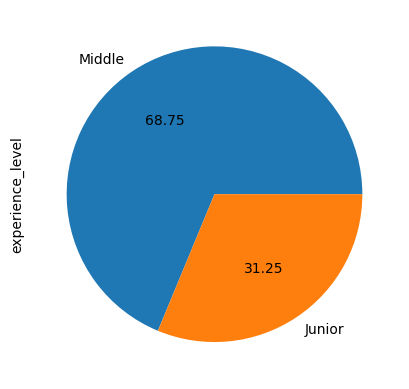

In [116]:
Filter_CompanyLocation["experience_level"].value_counts().plot(kind="pie", autopct="%.2f")

<Axes: ylabel='remote_ratio'>

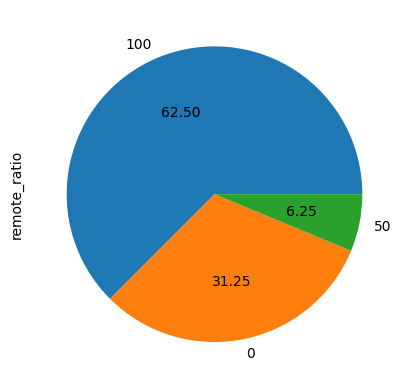

In [129]:
Filter_CompanyLocation["remote_ratio"].value_counts().plot(kind="pie", autopct="%.2f")

In [120]:
Filter_CompanyLocation.min()

Unnamed: 0                    23
work_year                   2020
experience_level          Junior
employment_type               FT
job_title           data analyst
salary_in_usd              50000
remote_ratio                   0
company_location              US
company_size                   M
dtype: object

<Axes: >

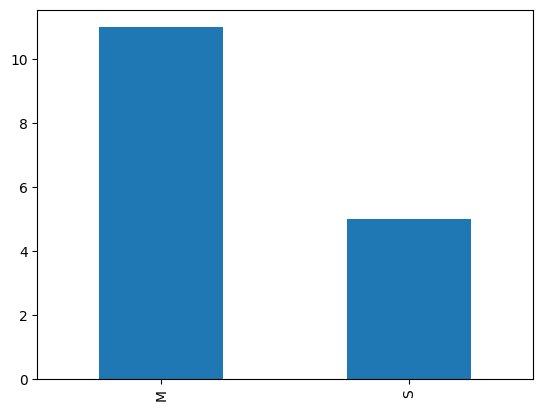

In [143]:
Filter_CompanyLocation["company_size"].value_counts().plot(kind="bar")

In [153]:
filter_list = ['S']

Filter_CompanyLocation_S=Filter_CompanyLocation[Filter_CompanyLocation.company_size.isin(filter_list)]

Filter_CompanyLocation_S

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
118,118,2021,Junior,FT,data analyst,90000,100,US,S
168,168,2021,Junior,FT,data analyst,55000,50,US,S
172,172,2021,Junior,FT,data analyst,60000,100,US,S
367,367,2022,Middle,FT,data analyst,58000,0,US,S
406,406,2022,Middle,FT,data analyst,58000,0,US,S


In [160]:


filter_list = ['M']

Filter_CompanyLocation_M=Filter_CompanyLocation[Filter_CompanyLocation.company_size.isin(filter_list)]

Filter_CompanyLocation_M

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
23,23,2020,Middle,FT,data analyst,98000,0,US,M
76,76,2021,Middle,FT,data analyst,100000,100,US,M
79,79,2021,Junior,FT,data analyst,80000,100,US,M
122,122,2021,Junior,FT,data analyst,50000,100,US,M
135,135,2021,Middle,FT,data analyst,90000,100,US,M
307,307,2022,Middle,FT,data analyst,106260,0,US,M
308,308,2022,Middle,FT,data analyst,126500,0,US,M
329,329,2022,Middle,FT,data analyst,115500,100,US,M
336,336,2022,Middle,FT,data analyst,167000,100,US,M
470,470,2022,Middle,FT,data analyst,135000,100,US,M


In [154]:
filter_list = ['Junior']

Filter_CompanyLocation_Junior_S=Filter_CompanyLocation_S[Filter_CompanyLocation_S.experience_level.isin(filter_list)]

Filter_CompanyLocation_Junior_S

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
118,118,2021,Junior,FT,data analyst,90000,100,US,S
168,168,2021,Junior,FT,data analyst,55000,50,US,S
172,172,2021,Junior,FT,data analyst,60000,100,US,S


In [162]:
filter_list = ['Junior']


Filter_CompanyLocation_Junior_M= Filter_CompanyLocation_M[Filter_CompanyLocation_M.experience_level.isin(filter_list)]

Filter_CompanyLocation_Junior_M



,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
79,79,2021,Junior,FT,data analyst,80000,100,US,M
122,122,2021,Junior,FT,data analyst,50000,100,US,M


In [163]:
Filter_CompanyLocation_Junior_M.min()


Unnamed: 0                    79
work_year                   2021
experience_level          Junior
employment_type               FT
job_title           data analyst
salary_in_usd              50000
remote_ratio                 100
company_location              US
company_size                   M
dtype: object

In [164]:
Filter_CompanyLocation_Junior_M.max()

Unnamed: 0                   122
work_year                   2021
experience_level          Junior
employment_type               FT
job_title           data analyst
salary_in_usd              80000
remote_ratio                 100
company_location              US
company_size                   M
dtype: object

<Axes: ylabel='remote_ratio'>

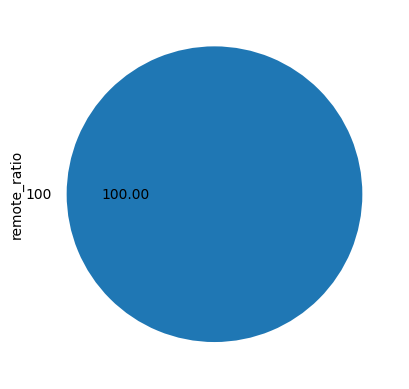

In [165]:
Filter_CompanyLocation_Junior_M["remote_ratio"].value_counts().plot(kind="pie", autopct="%.2f")

In [155]:
filter_list = ['Middle']

Filter_CompanyLocation_Mid_S=Filter_CompanyLocation_S[Filter_CompanyLocation_S.experience_level.isin(filter_list)]

Filter_CompanyLocation_Mid_S

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
367,367,2022,Middle,FT,data analyst,58000,0,US,S
406,406,2022,Middle,FT,data analyst,58000,0,US,S


In [167]:
filter_list = ["Middle"]


Filter_CompanyLocation_Middle_M= Filter_CompanyLocation_M[Filter_CompanyLocation_M.experience_level.isin(filter_list)]

Filter_CompanyLocation_Middle_M

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
23,23,2020,Middle,FT,data analyst,98000,0,US,M
76,76,2021,Middle,FT,data analyst,100000,100,US,M
135,135,2021,Middle,FT,data analyst,90000,100,US,M
307,307,2022,Middle,FT,data analyst,106260,0,US,M
308,308,2022,Middle,FT,data analyst,126500,0,US,M
329,329,2022,Middle,FT,data analyst,115500,100,US,M
336,336,2022,Middle,FT,data analyst,167000,100,US,M
470,470,2022,Middle,FT,data analyst,135000,100,US,M
471,471,2022,Middle,FT,data analyst,50000,100,US,M


In [168]:
Filter_CompanyLocation_Middle_M.min()

Unnamed: 0                    23
work_year                   2020
experience_level          Middle
employment_type               FT
job_title           data analyst
salary_in_usd              50000
remote_ratio                   0
company_location              US
company_size                   M
dtype: object

In [169]:
Filter_CompanyLocation_Middle_M.max()

Unnamed: 0                   471
work_year                   2022
experience_level          Middle
employment_type               FT
job_title           data analyst
salary_in_usd             167000
remote_ratio                 100
company_location              US
company_size                   M
dtype: object

In [170]:
len(Filter_CompanyLocation_Middle_M)

9

<Axes: ylabel='remote_ratio'>

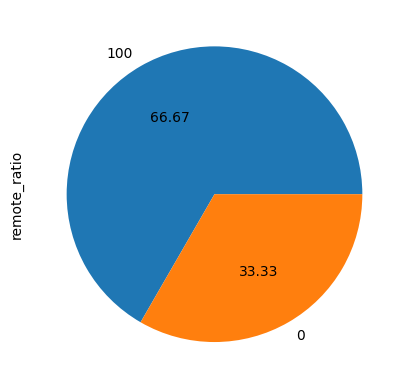

In [171]:
Filter_CompanyLocation_Middle_M["remote_ratio"].value_counts().plot(kind="pie", autopct="%.2f")

In [156]:
len(Filter_CompanyLocation_Mid_S)

2

In [158]:
Filter_CompanyLocation_Mid_S.min()

Unnamed: 0                   367
work_year                   2022
experience_level          Middle
employment_type               FT
job_title           data analyst
salary_in_usd              58000
remote_ratio                   0
company_location              US
company_size                   S
dtype: object

In [159]:
Filter_CompanyLocation_Mid_S.max()

Unnamed: 0                   406
work_year                   2022
experience_level          Middle
employment_type               FT
job_title           data analyst
salary_in_usd              58000
remote_ratio                   0
company_location              US
company_size                   S
dtype: object

<Axes: ylabel='remote_ratio'>

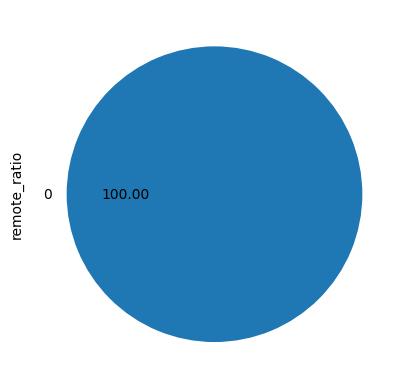

In [157]:
Filter_CompanyLocation_Mid_S["remote_ratio"].value_counts().plot(kind="pie", autopct="%.2f")

In [140]:
filter_list = ['US']

Filter_CompanyLocation_Junior_S_US=Filter_CompanyLocation_Junior_S[Filter_CompanyLocation_Junior_S.company_location.isin(filter_list)]

Filter_CompanyLocation_Junior_S_US

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
118,118,2021,Junior,FT,data analyst,90000,100,US,S
168,168,2021,Junior,FT,data analyst,55000,50,US,S
172,172,2021,Junior,FT,data analyst,60000,100,US,S


In [144]:
Filter_CompanyLocation_Junior_S_US.min()


Unnamed: 0                   118
work_year                   2021
experience_level          Junior
employment_type               FT
job_title           data analyst
salary_in_usd              55000
remote_ratio                  50
company_location              US
company_size                   S
dtype: object

In [145]:
Filter_CompanyLocation_Junior_S_US.max()


Unnamed: 0                   172
work_year                   2021
experience_level          Junior
employment_type               FT
job_title           data analyst
salary_in_usd              90000
remote_ratio                 100
company_location              US
company_size                   S
dtype: object

In [148]:
len(Filter_CompanyLocation_Junior_S_US)

3

<Axes: ylabel='remote_ratio'>

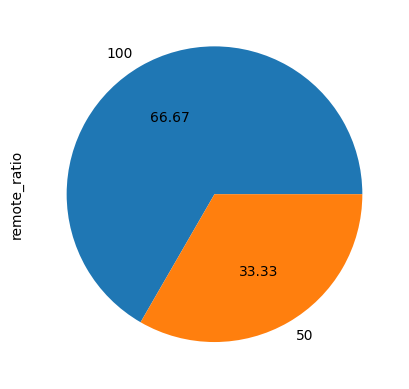

In [146]:
Filter_CompanyLocation_Junior_S_US["remote_ratio"].value_counts().plot(kind="pie", autopct="%.2f")

In [121]:
Filter_CompanyLocation.max()

Unnamed: 0                   471
work_year                   2022
experience_level          Middle
employment_type               FT
job_title           data analyst
salary_in_usd             167000
remote_ratio                 100
company_location              US
company_size                   S
dtype: object

In [124]:
Filter_CompanyLocation["remote_ratio"].value_counts()

100    10
0       5
50      1
Name: remote_ratio, dtype: int64

TypeError: 'str' object is not callable

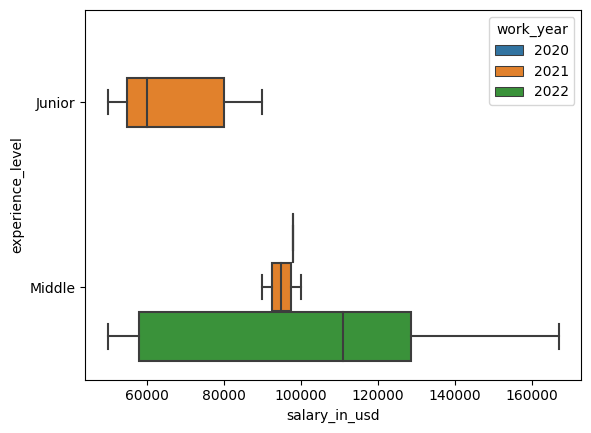

In [172]:
#Showing a visual of all careers, years and there U.S. Salary 
order = ['Junior', 'Middle']
sns.boxplot(x=Filter_CompanyLocation['salary_in_usd'],
             y=Filter_CompanyLocation['experience_level'], 
             order=order,
             hue=Filter_CompanyLocation['work_year'],
             showfliers = False)   
plt.title('The relationship between salary and experience_level');